# sales data analysis 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from math import ceil
from itertools import combinations 
from collections import Counter

# Importing data

In [50]:
""" our data is in 12 files so we are using this code to make it in one dataframe. """

# listdir is used to find name of all files in our folder and we are using this variable to store it.
read_all_file = listdir("data sets/salese data")

#this is the dataframe where we are going to save all of aur data of files.
org_data = pd.DataFrame()

# this loop is using read_all_file variable to call each file one by one from folder and append it to org_data.
for files in read_all_file:
    df = pd.read_csv(f"data sets/salese data/{files}")
    org_data = pd.concat([org_data,df])

# Samples of data

In [51]:
# making a copy of original data as Full_data so it cant affect original data.
full_data = org_data.copy()

# 5 samples of data
full_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8829,287233,AA Batteries (4-pack),1,3.84,11/07/19 09:59,"981 Cherry St, Seattle, WA 98101"
8417,267393,27in FHD Monitor,1,149.99,10/31/19 14:45,"695 5th St, Los Angeles, CA 90001"
3295,262497,Lightning Charging Cable,1,14.95,10/11/19 10:52,"118 7th St, Seattle, WA 98101"
3925,299398,iPhone,1,700,12/09/19 12:23,"562 1st St, San Francisco, CA 94016"
11886,248032,Wired Headphones,1,11.99,08/27/19 06:50,"341 Wilson St, Atlanta, GA 30301"


# Info of data

In [52]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Removing all the rows which has all null values. 

In [53]:
full_data = full_data.dropna(how = "all")

# Dupicate values of data

In [54]:
full_data[full_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11574,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11618,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


# Removing all the rows which has there columns as data.

In [55]:
# we are doing this first because with drop_duplicates we are only going to remove only duplicates
# so if we are not doing this first we are going to left with a row which has its columns as data.

full_data = full_data[full_data["Order ID"].str[0:2] != "Or"]

# Removing duplicates

In [56]:
full_data.drop_duplicates(inplace = True)

# changing data type of columns

In [57]:
# Dictionary which has all columns and their desired data type.
specific_data_types = {"Order ID": int, "Quantity Ordered": "int8", "Price Each": float}
full_data = full_data.astype(specific_data_types)

# changind order date column to datetime object.
full_data["Order Date"] = pd.to_datetime(full_data["Order Date"], format = "%m/%d/%y %H:%M")

# Info after changing data type

In [58]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int8          
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int8(1), object(2)
memory usage: 8.0+ MB


.


Question 1: What was the best month for sales? How much was earned that month ?

--->

# Using pands

In [59]:
# taking copy of full_data as df_q1 so we can't change full data.
df_q1 = full_data.copy()

In [60]:
# adding month column
df_q1["month"] = df_q1["Order Date"].dt.month

# adding total price column because we are given only price each.
df_q1["total price"] = df_q1["Quantity Ordered"]*df_q1["Price Each"]

# to check new added column.
df_q1.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total price
23872,318471,AAA Batteries (4-pack),1,2.99,2019-12-07 14:52:00,"128 Highland St, Atlanta, GA 30301",12,2.99
22798,317441,Wired Headphones,1,11.99,2019-12-03 10:42:00,"513 Elm St, Boston, MA 02215",12,11.99
2211,261467,27in 4K Gaming Monitor,1,389.99,2019-10-13 18:00:00,"14 Cedar St, Boston, MA 02215",10,389.99
1358,211211,AAA Batteries (4-pack),1,2.99,2019-06-08 23:16:00,"117 West St, Los Angeles, CA 90001",6,2.99
10532,160580,Apple Airpods Headphones,1,150.00,2019-02-06 09:47:00,"284 Main St, San Francisco, CA 94016",2,150.00


In [61]:
# making temporary groupby object.
temp_data_q1 = df_q1.groupby("month")["total price"].sum()

# Answer

In [62]:
temp_data_q1.sort_values(ascending = False).head(1)

month
12    4608295.7
Name: total price, dtype: float64

# by using matplotlib

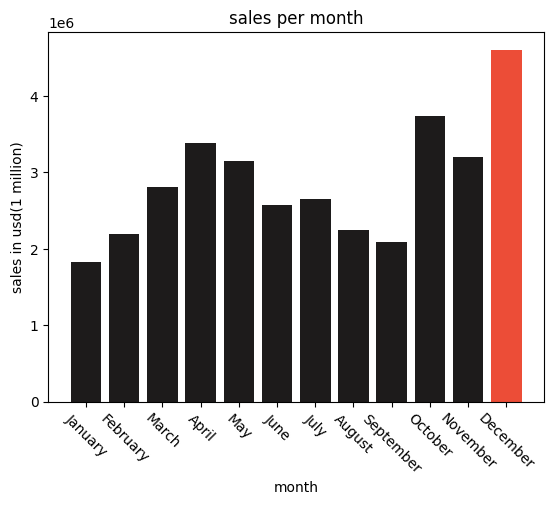

In [63]:
months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# this is used to give different color to the longest bar of data.
color1 = ["#EC4D37" if data == temp_data_q1.max() else "#1D1B1B" for data in temp_data_q1]
plt.bar(months,temp_data_q1.values,color = color1)
plt.title('sales per month')
plt.xlabel('month')
plt.ylabel('sales in usd(1 million)')
plt.xticks(rotation = -45)
plt.show()

.

Question 2: What city sold the most product?

--->

# Using pands

In [64]:
# taking copy of full_data as df_q2 so we can't change full data. 
df_q2 = full_data.copy()

In [65]:
# this code is used to separate Purchase Address by , and add its 2 value in city column.
df_q2["city"] = [data[1] for data in (df_q2["Purchase Address"].str.split(","))]

# to check new added column.
df_q2.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city
1743,238345,AAA Batteries (4-pack),3,2.99,2019-08-04 12:09:00,"987 Cherry St, Boston, MA 02215",Boston
9119,202755,20in Monitor,1,109.99,2019-05-20 13:44:00,"300 Cedar St, Los Angeles, CA 90001",Los Angeles
12557,271346,Apple Airpods Headphones,1,150.00,2019-10-31 13:28:00,"582 Lincoln St, Los Angeles, CA 90001",Los Angeles
1533,238146,Apple Airpods Headphones,1,150.00,2019-08-21 00:24:00,"142 River St, San Francisco, CA 94016",San Francisco
6999,254860,USB-C Charging Cable,1,11.95,2019-09-07 22:43:00,"706 South St, Seattle, WA 98101",Seattle


In [66]:
# making temporary groupby object.
temp_df_q2 = df_q2.groupby("city")["Quantity Ordered"].sum()

# Answer

In [67]:
temp_df_q2.sort_values(ascending = False).head(1).index[0]

' San Francisco'

# by using matplotlib

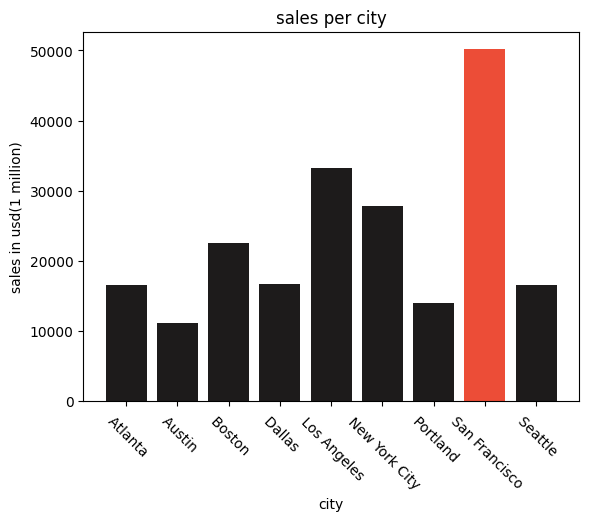

In [68]:
# this is used to give different color to the longest bar of data.
color2 = ["#EC4D37" if data == temp_df_q2.max() else "#1D1B1B" for data in temp_df_q2]
plt.bar(temp_df_q2.index,temp_df_q2.values ,color = color2)
plt.xticks(rotation = -45)
plt.title('sales per city')
plt.xlabel('city')
plt.ylabel('sales in usd(1 million)')
plt.show()

.


Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

--->

# Using pands

In [69]:
# taking copy of full_data as df_q3 so we can't change full data.
df_q3 = full_data.copy()

In [70]:
# extracting hour from order date.
df_q3["time hour"] = df_q3['Order Date'].dt.hour

In [71]:
# to make previous date groupby object because we are not going to use that any more.
df_q3 = df_q3.groupby("time hour")['Order ID'].count()

# Answer

In [72]:
df_q3.sort_values(ascending = False).head(1).index[0]

19

# by using matplotlib

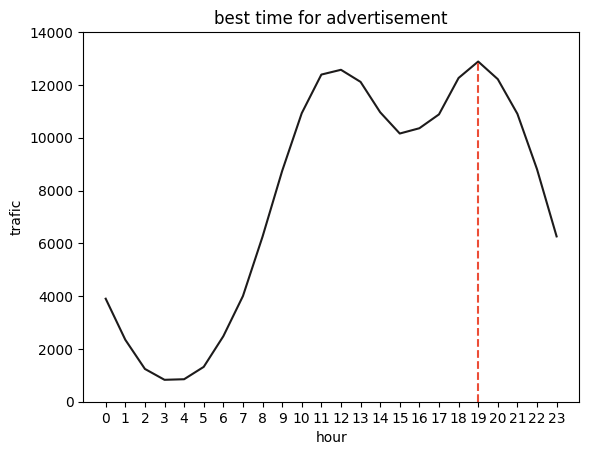

In [73]:
hour = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

# this is to make vertical line where line is at its peak.
line_position = df_q3.sort_values(ascending = False).head(1).index[0]

# this is to stop vertical line at the peak of line.
line_hight = df_q3.max()/14000

plt.plot(hour,df_q3.values, color = "#1D1B1B")
plt.xticks(hour)
plt.ylim(0, 14000)
plt.axvline(line_position, color = "#EC4D37", linestyle='--', ymax=line_hight)
plt.title('best time for advertisement')
plt.xlabel('hour')
plt.ylabel('trafic')
plt.show()

.

Question 4: What products are most often sold together?

--->

# Using pands

In [74]:
# taking copy of full_data as df_q4 so we can't change full data. 
df_q4 = full_data.copy()

In [75]:
# making temporary groupby object.
temp_df_q4 = df_q4.groupby("Order ID")["Product"].unique().to_frame()

In [76]:
# extracting only those order id and there order which has more than one orders.
temp_df_q4 = temp_df_q4[temp_df_q4["Product"].str.len() > 1]

In [77]:
# function to make combos of 2 items in every order id.
def comination_finder(lis):
    return list(combinations(lis,2))

In [78]:
# appling comination_finder to data and storing it in Product combo. 
temp_df_q4["Product combo"] = temp_df_q4["Product"].apply(comination_finder)

In [79]:
# making list of every Product combo.
all_combo = []
for combos in temp_df_q4['Product combo']:
    for each_combo in combos:
        all_combo.append(each_combo)

In [80]:
# counting how many times each combo appeared. 
all_combo_count = Counter(all_combo)

# Answer

In [81]:
# top 10 combos.
all_combo_count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

.

Question 5: What product sold the most? Why do you think it sold the most?

--->

# Using pands

In [82]:
# taking copy of full_data as df_q5 so we can't change full data.
df_q5 = full_data.copy()

In [83]:
# making temporary groupby object.
temp_df_q5_1 = df_q5.groupby("Product")["Quantity Ordered"].sum()

# most sold product

In [84]:
temp_df_q5_1.sort_values(ascending = False).head(1).index[0]

'AAA Batteries (4-pack)'

# by using matplotlib

to see the reason of most sales we have to visualize data in matplotlib.

In [85]:
# making temporary groupby object.
temp_df_q5_2 = df_q5.groupby("Product")["Price Each"].unique()

# this plot is to see if price play any role in increasing of sales.

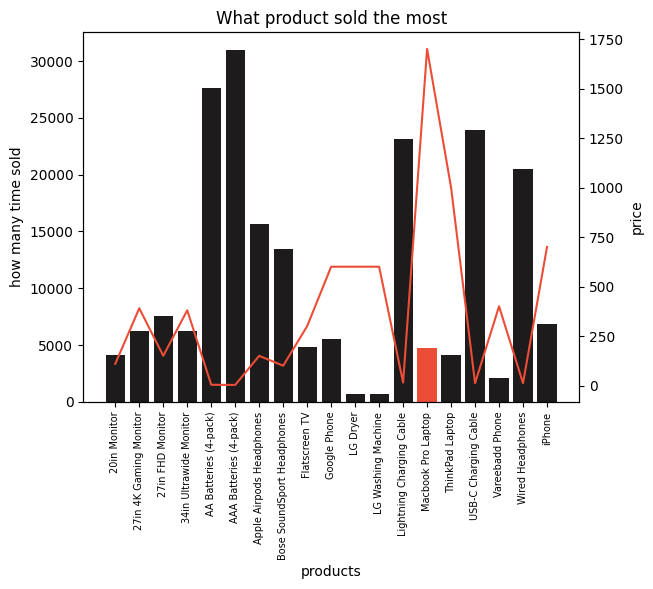

In [86]:
colorq5 = ["#EC4D37" if data == temp_df_q5_2.max() else "#1D1B1B" for data in temp_df_q5_2]
fig , ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(temp_df_q5_1.index,temp_df_q5_1.values, color = colorq5)
ax2.plot(temp_df_q5_2.index,temp_df_q5_2.values, color = "#EC4D37")
plt.title("What product sold the most")
ax1.set_xticks(np.arange(len(temp_df_q5_2.index)))
ax1.set_xticklabels(temp_df_q5_2.index,rotation = 90,size = 7)
ax1.set_xlabel("products")
ax1.set_ylabel("how many time sold")
ax2.set_ylabel("price")
plt.show()

# these pie charts are used to find if month can increase sales of any product.

In [87]:
# mwe are using df of question number 1 because it already has month column.
piedt1 = df_q1.copy()

In [88]:
# making a groupby object.
piesdt1 = piedt1.groupby("Product")

In [89]:
cmap = plt.get_cmap("hot")

# this function is use to give colors to parts of pie chart.
def get_colors(num_colors, cmap):
    return cmap(np.linspace(0, 1, num_colors))

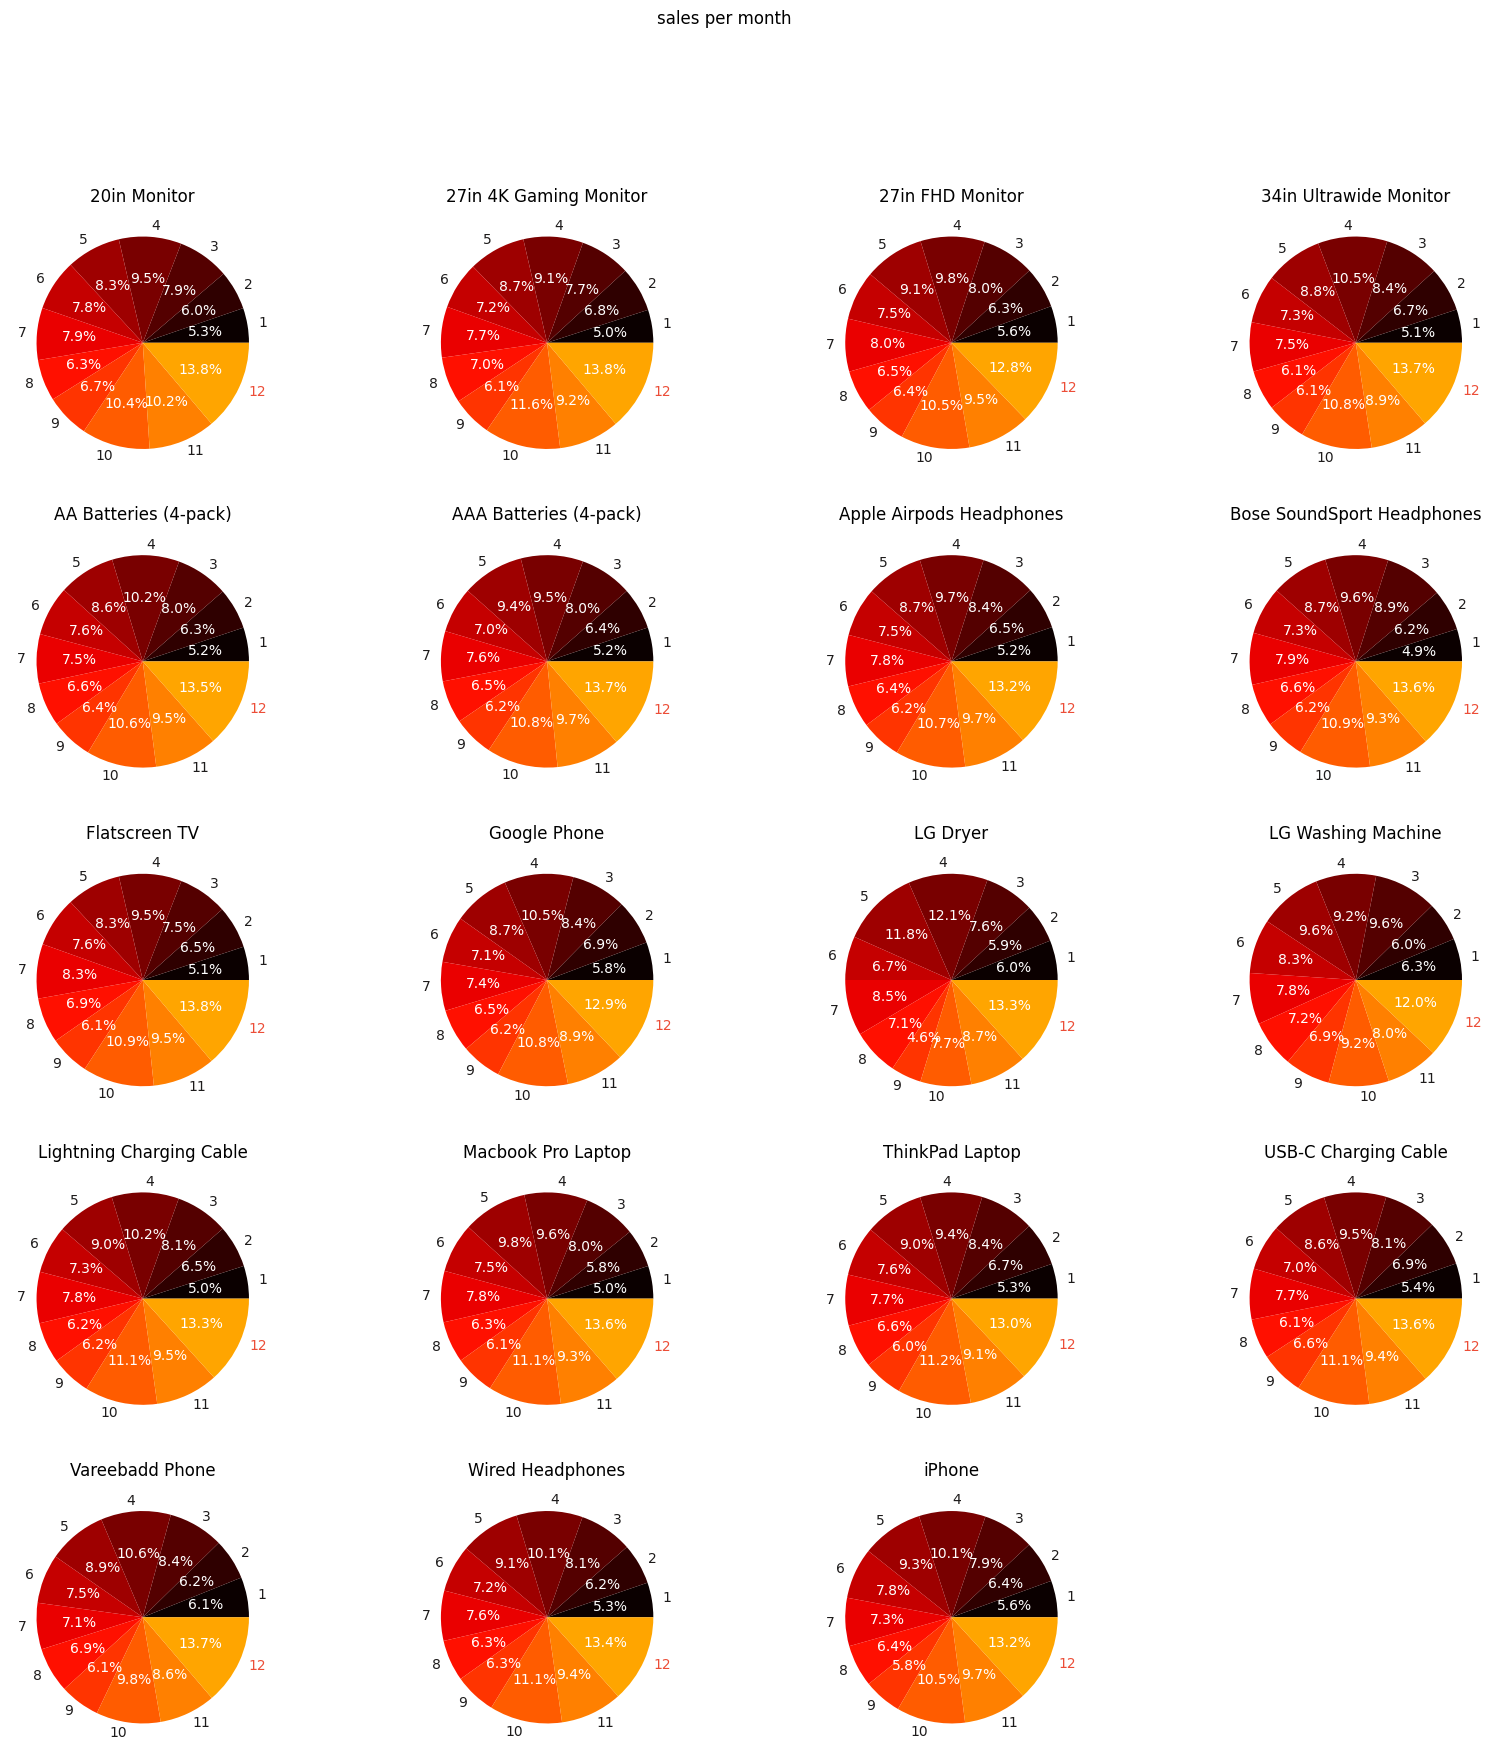

In [90]:
# this variable defines the number of rows in aur figure.
num_row = ceil(len(list(piesdt1["Quantity Ordered"].sum().index))/4)

num_col = 4
size = 5

# these r and c are only helping in ploting pie charts in our figure.
r = 0
c = 0
fig , ax = plt.subplots(nrows = num_row, ncols = num_col, figsize = (20,20))
fig.suptitle('sales per month')
for i in (piesdt1.count().reset_index()["Product"]):
    colors = get_colors(len(list(piesdt1["Quantity Ordered"].sum())), cmap)
    x = piesdt1.get_group(i).groupby("month")["Quantity Ordered"].sum()
    patches, texts, autotexts = ax[r,c].pie(x, labels = x.index,autopct='%1.1f%%',textprops={'color': "white"}, colors = colors)
    
    # this code is use to change color of text outside the pie charts.
    [text.set_color("#1D1B1B") for text in texts]
    
    # this code is use to change color of text whose part has maximum area.
    texts[int(np.where(x.values == x.max())[0][0])].set_color("#EC4D37")
    [autotext.set_color('white') for autotext in autotexts]
    ax[r,c].set_title(i)
    if c < num_col-1:
        c += 1
    else:
        c = 0
        r += 1
def is_blank(ax):
    return not ax.has_data()

for ax in ax.flatten():
    if is_blank(ax):
        fig.delaxes(ax)

# these pie charts are used to find if city can increase sales of any product.

In [91]:
# we are using df of question number 2 because it already has city column.
piedt2 = df_q2.copy()

In [92]:
# making a groupby object.
piesdt2 = piedt2.groupby("Product")

In [93]:
cmap = plt.get_cmap("autumn")

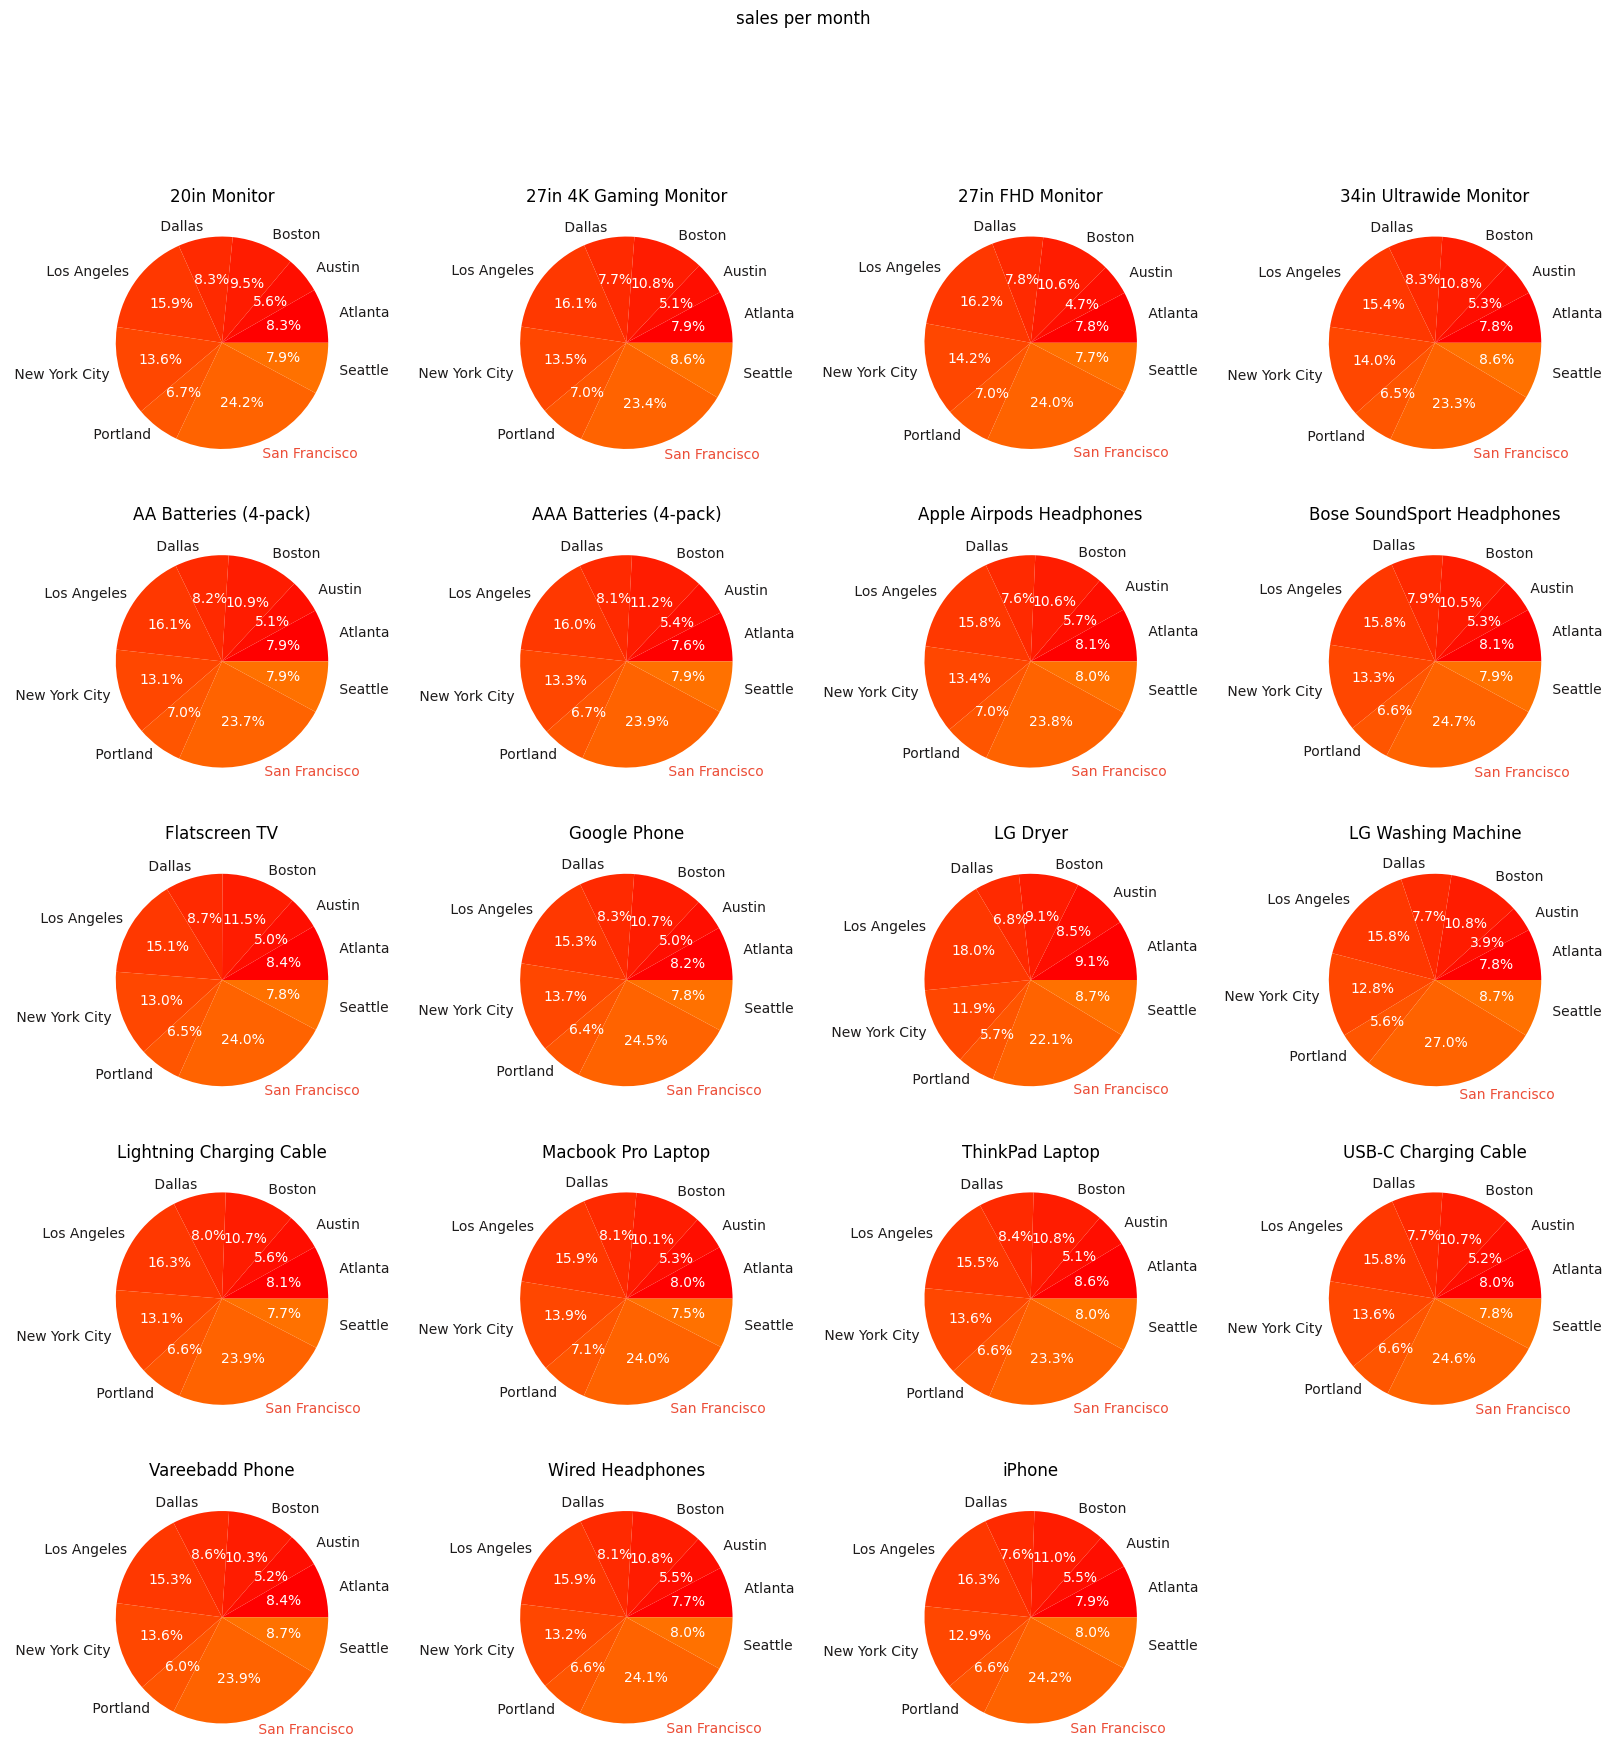

In [94]:
# this variable defines the number of rows in aur figuer.
num_row = ceil(len(list(piesdt2["Quantity Ordered"].sum().index))/4)
num_col = 4
size = 5

# these r and c are only helping in ploting pie charts in our figure.
r = 0
c = 0
fig , ax = plt.subplots(nrows = num_row, ncols = num_col, figsize = (20,20))
fig.suptitle('sales per month')
for i in (piesdt2.count().reset_index()["Product"]):
    colors = get_colors(len(list(piesdt2["Quantity Ordered"].sum())), cmap)
    x = piesdt2.get_group(i).groupby("city")["Quantity Ordered"].sum()
    patches, texts, autotexts = ax[r,c].pie(x, labels = x.index,autopct='%1.1f%%',textprops={'color': "white"}, colors = colors)

    # this code is use to change color of text outside the pie charts.
    [text.set_color("#1D1B1B") for text in texts]

    # this code is use to change color of text whose part has maximum area.
    texts[int(np.where(x.values == x.max())[0][0])].set_color("#EC4D37")
    [autotext.set_color('white') for autotext in autotexts]
    ax[r,c].set_title(i)
    if c < num_col-1:
        c += 1
    else:
        c = 0
        r += 1
def is_blank(ax):
    return not ax.has_data()

for ax in ax.flatten():
    if is_blank(ax):
        fig.delaxes(ax)

## from the previous charts we can see that only the price play a significant role in sales or product